# 实验6-神经网络（Neural Network）

<table style="margin: 0 auto; width: 30%; border-collapse: collapse; border: 1px solid black;" data-id="student-info">  
    <colgroup>  
        <col style="width: 35%;">  
        <col style="width: 65%;">  
    </colgroup>  
    <tr>  
        <td style="border: 1px solid black;">班级</td> <td style="border: 1px solid black;">24智能</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">学号</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">姓名</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
    <tr>  
        <td style="border: 1px solid black;">Email</td> <td style="border: 1px solid black;">未填写</td>  
    </tr>  
</table>

## 实验目的

通过构建一个简单神经网络分类器，学习了解神经网络基本的工作原理。

- 逻辑回归神经网络分类器（logistic regression Neural Network classifier）
  - 数据集预处理
  - 简单的神经网络架构
  - 初始化神经网络参数
  - 激活函数
  - 前向传播
  - 损失函数(Loss Function)
  - 梯度下降算法
  - 优化神经网络
  - 使用神经网络模型进行预测
  - 讨论分析和总结

## 实验准备

首先，让我们运行下面的单元格来导入您在此作业中需要的所有包, 并且为实验的代码的测试做准备。

In [1]:
# 导入需要的Python包
%matplotlib inline

import numpy as np
import copy
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# 获取项目根目录
project_root = Path().resolve().parent
sys.path.append(str(project_root / 'tests'))
sys.path.append(str(project_root / 'util'))

# 导入测试套件和其他工具
from test_suite6 import TestSuite6
from lr_utils import load_dataset
from notebook2pdf import convert_notebook_to_webpdf
from notebook_info_extractor import extract_from_ipynb
from IPython import get_ipython

testsuite6 = TestSuite6()

ip = get_ipython()
notebook_file = None
if '__vsc_ipynb_file__' in ip.user_ns:
    notebook_file = ip.user_ns['__vsc_ipynb_file__']

stu_info = extract_from_ipynb(notebook_file)

print(f"stu_info: {stu_info}")

stu_info: {'class_id': '24智能', 'student_id': '未填写', 'name': '未填写', 'email': '未填写'}


## 数据集概览和数据集预处理

您获得了一个数据集（"data.h5"），其中包含：
- 一个训练集，包含m_train(209)张图像，图像分为两类：分别被标记为猫（y=1）或非猫（y=0）
- 一个测试集，包含m_test(50)张图像，标记为猫或非猫
- 每张图像的形状为（num_px, num_px, 3），其中3代表3个通道（RGB）。因此，每张图像都是正方形的（高度 = num_px）和（宽度 = num_px）。(num_px-64)

您将构建一个简单的图像识别算法，能够正确地将图片分类为猫或非猫。

让我们更熟悉这个数据集。通过运行以下代码来加载数据。


In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
train_set_x_orig.shape, train_set_y.shape, test_set_x_orig.shape, test_set_y.shape, classes.shape

((209, 64, 64, 3), (1, 209), (50, 64, 64, 3), (1, 50), (2,))

我们在图像数据集（训练集和测试集）的末尾添加了"_orig"，因为我们要对它们进行预处理。预处理后，我们将得到train_set_x和test_set_x（标签train_set_y和test_set_y不需要任何预处理）。

您的train_set_x_orig和test_set_x_orig的每一行都是一个表示图像的数组。您可以通过运行以下代码来可视化一个示例。您也可以随意更改`index`值并重新运行以查看其他图像。

y = [0], it's a 'non-cat' picture.


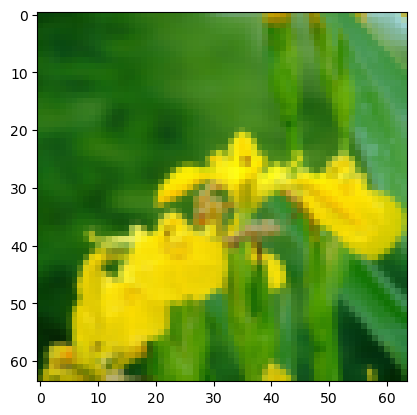

In [ ]:
# Example of a picture
index = 1
plt.imshow(train_set_x_orig[index]) # 显示图片
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")
# print(train_set_x_orig[index])  # 打印该图片每个通道每个像素的值

## 习题一-数据集的形状

深度学习中的许多软件错误都来自于矩阵/向量维度不匹配。如果您能保持矩阵/向量维度的正确性，您将在调试深度学习程序和修正bug方面会很擅长。

找出以下值：
- m_train（训练样本数量）
- m_test（测试样本数量）
- num_px（= 训练图像的高度 = 宽度）
请记住，`train_set_x_orig`是一个形状为(m_train, num_px, num_px, 3)的numpy数组。例如，您可以通过写`train_set_x_orig.shape[0]`来访问`m_train`。

In [5]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: get_dataset_info
def get_dataset_info(train_set_x_orig, test_set_x_orig):
    """
    获取数据集的基本信息

    参数:
    train_set_x_orig -- 训练集图像数据，形状为 (m_train, num_px, num_px, 3)
    test_set_x_orig -- 测试集图像数据，形状为 (m_test, num_px, num_px, 3)

    返回:
    m_train -- 训练样本数量
    m_test -- 测试样本数量
    num_px -- 图像的高度和宽度（假设图像是正方形的）
    """

    ### 开始编写你的代码（3行代码） ###
    # 提示：使用 .shape 属性来获取数组的维度信息
    # train_set_x_orig.shape 会返回 (m_train, num_px, num_px, 3)

    m_train = None  # 请填写获取训练样本数量的代码
    m_test = None   # 请填写获取测试样本数量的代码
    num_px = None   # 请填写获取图像尺寸的代码

    ### 结束编写你的代码 ###


    return m_train, m_test, num_px

In [6]:
# 调用习题一的函数
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
get_dataset_info(train_set_x_orig, test_set_x_orig)

(None, None, None)

**预期输出： m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td> m_train </td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>m_test</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>num_px</td>
    <td> 64 </td> 
  </tr>
  
</table>


In [7]:
# 习题一的测试用例以及自动评分
testsuite6.test_get_dataset_info(get_dataset_info)

测试失败 test_get_dataset_info: 训练样本数量应为100, 实际为 None


## 习题二-数据集预处理

为了方便，您现在应该将形状为 (num_px, num_px, 3) 的图像重塑为形状为 (num_px $*$ num_px $*$ 3, 1) 的 numpy 数组。经过这样处理后，我们的训练（和测试）数据集是一个三维的 numpy 数组，其中每一列代表一个展平的图像。应该有 m_train（分别为 m_test）列。

重塑训练和测试数据集，使得大小为 (num_px, num_px, 3) 的图像被展平为形状为 (num\_px $*$ num\_px $*$ 3, 1) 的单个一维向量。

当您想要将形状为 (a,b,c,d) 的矩阵 X 展平为形状为 (b*c*d, a) 的矩阵 X_flatten 时，一个技巧是使用：
```python
# X.T 是 X 的转置
# 第二个参数-1意味着numpy将自动计算该维度的大小
X_flatten = X.reshape(X.shape[0], -1).T      
```

In [8]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: reshape_image_dataset
import numpy as np

def reshape_image_dataset(train_set, test_set):
    """
    将训练集和测试集中的图像数据重塑为列向量格式

    参数：
    train_set -- 训练集图像数据，形状为 (m_train, num_px, num_px, 3)
    test_set -- 测试集图像数据，形状为 (m_test, num_px, num_px, 3)

    返回：
    train_set_flatten -- 重塑后的训练集，形状为 (num_px * num_px * 3, m_train)
    test_set_flatten -- 重塑后的测试集，形状为 (num_px * num_px * 3, m_test)
    """

    # 开始编写你的代码（两行代码）
    # 提示：使用 reshape 和转置操作

    # 重塑训练集
    train_set_flatten = None  # 请替换为正确的代码

    # 重塑测试集
    test_set_flatten = None   # 请替换为正确的代码

    # 结束编写代码

    return train_set_flatten, test_set_flatten

In [9]:
# 调用函数将训练集和测试集数据展平
train_set_x_flatten, test_set_x_flatten = reshape_image_dataset(train_set_x_orig, test_set_x_orig)

# 验证结果
print("重塑后训练集形状:", train_set_x_flatten.shape)
print("重塑后测试集形状:", test_set_x_flatten.shape)

# 期望输出：
# 重塑后训练集形状: (12288, 209)
# 重塑后测试集形状: (12288, 50)

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
# 习题二的测试用例以及自动评分
testsuite6.test_reshape_image_dataset(reshape_image_dataset)

测试失败 test_reshape_image_dataset: 'NoneType' object has no attribute 'shape'


为了表示彩色图像，必须为每个像素指定红色、绿色和蓝色通道（RGB），因此像素值实际上是一个由三个数字组成的向量，范围从0到255。

机器学习中一个常见的预处理步骤是对数据集进行中心化和标准化，即从每个样本中减去整个numpy数组的均值，然后将每个样本除以整个numpy数组的标准差。但对于图像数据集，将数据集的每一行除以255（像素通道的最大值）更简单、更方便，并且效果几乎一样好。

在训练模型时，您将对一些初始输入进行权重乘法和偏置加法，以观察神经元激活。然后您使用梯度进行反向传播来训练模型。但是，每个特征具有相似的范围极其重要，这样我们的梯度就不会爆炸。您将在后面的讲座中更详细地看到这一点。

让我们对数据集进行标准化。

In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>

**您需要记住的关键知识点：**

预处理新数据集的常见步骤包括：
- 弄清楚问题的维度和形状（m_train、m_test、num_px等）
- 重塑数据集，使每个样本现在都是大小为（num_px \* num_px \* 3, 1）的向量
- 对数据进行"标准化"

## 简单的神经网络架构

In [ ]:
from IPython.display import display, Image
display(Image('./images/LogReg_kiank.png', width=650, height=400))

现在是时候设计一个简单的算法来区分猫图像和非猫图像了。

你将构建一个逻辑回归模型，使用神经网络的思维方式。上图解释了为什么**逻辑回归实际上是一个非常简单的神经网络！**

**算法的数学表达式**：

对于一个样本 $x^{(i)}$：
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$ \hat{y}^{(i)} = a^{(i)} = \text{sigmoid}(z^{(i)})\tag{2} $$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)}) \tag{3} $$

对上面的公式的解释：

- $z^{(i)}$ 是线性组合，$w$ 是权重向量，$b$ 是偏置。
    - 当$x^{(i)}$ 向量中一个值（也就是图片的一个像素一个颜色的亮度)和图片为猫的概率为正相关时，对应的权重就为正数，值也就越大。
    - 当$x^{(i)}$ 向量中一个值（也就是图片的一个像素一个颜色的亮度)和图片为猫的概率为负相关时，对应的权重就为负数，值也就越小。
    - 当$x^{(i)}$ 向量中一个值（也就是图片的一个像素一个颜色的亮度)和图片为猫的概度无关时，对应的权重就接近零。
    - $b$ 是偏置项, 表示函数值整体的偏移量。
- 激活函数sigmoid将线性函数映射到0-1区间，从而实现二分类。
- 损失函数为交叉熵损失函数（cross-entropy loss），用于计算预测值和真实值之间的差异。使用交叉熵损失函数，而不是使用均方误差的方法（ $L = \frac{1}{2}(\hat{y} - y)^2$ ），好处是它在预测值接近0或1时会产生较大的梯度，从而加速训练过程。


成本函数通过对所有训练样本求和来计算：
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)}) \tag{6} $$

**关键步骤**：
在这个练习中，你将执行以下步骤：
- 初始化模型参数
- 通过最小化成本函数来学习模型参数
- 使用学习到的参数进行预测（在测试集上）
- 分析结果并得出结论

## 习题三-激活函数

接下来我们将一步步的构建神经网络的各个部分。首先，我们需要实现sigmoid函数，你需要计算

$$sigmoid(z) = \frac{1}{1 + e^{-z}}$$

其中$z = w^T x + b$。提示：请使用np.exp()来计算$e^{-z}$ 。

In [ ]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    计算 z 的 sigmoid 函数值

    参数:
    z -- 一个标量或任意形状的 numpy 数组

    Return:
    s -- sigmoid(z)
    """

    #(一行代码)
    # s = ...
    # 你的代码从这里开始
    s = None  # 请将None替换为正确的代码

    # 你的代码到这里结束
    return s

In [ ]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
# 预期值应该为： [0.5        0.88079708]

In [ ]:
# 习题三的测试用例以及自动评分
testsuite6.test_sigmoid(sigmoid)

## 习题四-初始化神经网络参数

在下面的单元格中，您需要实现`initialize_with_zeros(dim)`函数。该函数接受一个整数参数`dim`，表示参数的维度，并返回一个包含零的向量`w`和一个零标量`b`。提示：您可以使用`np.zeros()`来创建一个包含零的向量。

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: initialize_with_zeros

import numpy as np
def initialize_with_zeros(dim):
    """
    这个函数创建一个形状为(dim, 1)的零向量w, 并将b初始化为0。

    参数:
    dim -- 向量w的维度(在这个案例中也就是输入的图像的维度)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    # (2行代码)
    # w = ...
    # b = ...
    # 你的代码从这里开始
    w = None # 请将None替换为正确的代码
    b = None # 请将None替换为正确的代码

    # 你的代码到这里结束

    return w, b

In [ ]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

# 期望输出：
# w = [[0.]
#  [0.]]
# b = 0.0

In [ ]:
# 习题四的测试用例以及自动评分
testsuite6.test_initialize_with_zeros(initialize_with_zeros)

## 习题五-实现前向传播

实现一个函数`propagate(w, b, X, Y)`计算成本函数的值和梯度。正向传播函数的基本步骤如下：

- 输入参数
  - `w`：权重向量，初始值为零向量
  - `b`：偏置标量，初始值为零
  - `X`：经过了预处理的m张图像数据，形状为 (num_px * num_px * 3, m)
  - `Y`：标签向量，形状为 (1, m)
- 返回值
  -  `grads`：包含梯度的字典, 键为dw和db, dw为权重向量的梯度，db为偏置向量的梯度
  - `cost`：计算得到的成本函数值

**提示**

前向传播的基本步骤：

- X是输入的数据集
- 计算 $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$，其中$ \sigma() $ 是习题3实现的`sigmoid`激活函数
- 计算成本函数：$J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$
- 计算梯度，下面是计算梯度的两个公式：
$$ 
\frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}
$$

$$ 
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}
$$

In [ ]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    使用上面解释的方式计算成本函数和梯度用于前向传播
    """

    m = X.shape[1]

    #(大约4行代码)
    # 使用激活函数进行计算
    # A = ...
    # 计算成本函数，使用np.dot函数来进行矩阵乘法运算，不要使用循环语句
    # cost = ...
    # 反向传播来发现梯度
    # dw = ...
    # db = ...
    # 你的代码从这里开始

    A = None # 请将None替换为正确的代码
    cost = None # 请将None替换为正确的代码
    dw = None # 请将None替换为正确的代码
    db = None # 请将None替换为正确的代码

    # 你的代码到这里结束
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [ ]:
w =  np.array([[1.], [2]])
b = 1.5

X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

**期望输出**

```
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
```

In [ ]:
# 测试习题五
testsuite6.test_propagate(propagate)

## 习题六-优化神经网络

- 你已经初始化了你的参数。
- 你也计算了成本函数（cost function）和它的梯度。
- 现在，你需要使用梯度下降算法来更新参数

实现优化神经网络的函数，你的目标是通过最小化成本函数J来学习到参数`w`和`b`。 对于一个参数 $\theta $，更新参数的规则是 $ \theta = \theta - \alpha \text{ } d\theta$ ，$ \alpha $ 是学习率， $ d\theta $是前向传播中计算出的参数的梯度。

In [ ]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    这个函数通过运行梯度下降算法来优化w和b

    参数：
    w -- 权重，大小为(num_px * num_px * 3, 1)的numpy数组
    b -- 偏置，标量
    X -- 形状为(num_px * num_px * 3, 样本数量)的数据
    Y -- 真实"标签"向量(如果不是猫则为0, 如果是猫则为1)，形状为(1, 样本数量)
    num_iterations -- 优化循环的迭代次数
    learning_rate -- 梯度下降更新规则的学习率
    print_cost -- 设为True时每100步打印一次损失

    返回值：
    params -- 包含权重w和偏置b的字典
    grads -- 包含权重和偏置相对于成本函数的梯度的字典
    costs -- 优化过程中计算的所有成本的列表，将用于绘制学习曲线

    提示：
    你基本上需要写出两个步骤并循环执行它们：
        1) 计算当前参数的成本和梯度。使用前面习题实现的函数propagate()。
        2) 使用梯度下降规则更新w和b的参数。

    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):
        # (≈ 1行代码)
        # 成本和梯度计算
        # grads, cost = ...
        # 你的代码从这里开始
        grads, cost = None # 请将None替换为正确的代码


        # 你的代码到这里结束

        # 从grads字典中检索梯度
        dw = grads["dw"]
        db = grads["db"]

        # 更新参数 (≈ 2行代码)
        # w = ...
        # b = ...
        # 你的代码从这里开始
        w = None # 请将None替换为正确的代码
        b = None # 请将None替换为正确的代码

        # 你的代码到这里结束
        # 记录成本
        if i % 100 == 0:
            costs.append(cost)

            # 每100次迭代打印一次成本
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [ ]:
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])

params, grads, costs = optimize(w, b, X, Y, num_iterations=101, learning_rate=0.1, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

# 期望输出：
# w = [[-0.70916784]
#  [-0.42390859]]
# b = 2.2689134634056387
# dw = [[ 0.06188603]
#  [-0.01407361]]
# db = -0.047093537632615125
# Costs = [array(5.80154532), array(0.31057104)]

In [ ]:
# 测试习题六
testsuite6.test_optimize(optimize)

## 习题七-预测

前面的函数将输出学习到的w和b。我们能够使用w和b来预测数据集X的标签。实现`predict()`函数。计算预测有两个步骤：

1. 计算 $\hat{Y} = A = \sigma(w^T X + b)$

2. 将a的条目转换为0（如果激活值 <= 0.5）或1（如果激活值 > 0.5），将预测存储在向量`Y_prediction`中。如果你愿意，可以在`for`循环中使用`if`/`else`语句（不过也有向量化的方法）。


In [ ]:
# UNQ_C7 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    使用学习到的逻辑回归参数(w, b)预测标签是0还是1

    参数：
    w -- 权重，大小为(num_px * num_px * 3, 1)的numpy数组
    b -- 偏置，标量
    X -- 大小为(num_px * num_px * 3, 样本数量)的数据

    返回值：
    Y_prediction -- 包含X中所有样本预测结果(0/1)的numpy数组(向量)
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    # 计算向量"A"，预测图片中出现猫的概率
    #(≈ 1行代码)
    # A = ...
    # 你的代码从这里开始
    A = None # 请将None替换为正确的代码

    # 你的代码到这里结束

    for i in range(A.shape[1]):
        # 将概率A[0,i]转换为实际预测p[0,i]
        #(≈ 4行代码)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] =
        # else:
        #     Y_prediction[0,i] =
        # 你的代码从这里开始
        if ... :                      # 请将...替换为正确的代码
            Y_prediction[0, i] = None # 请将None替换为正确的代码
        else:
            Y_prediction[0, i] = None # 请将None替换为正确的代码

        # 你的代码到这里结束

    return Y_prediction

In [ ]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))
# 期望输出：
# predictions = [[1. 1. 0.]]

In [ ]:
# 测试习题七
testsuite6.test_predict(predict)

<font color='blue'>
    
**需要记住的要点：**
    
你已经实现了几个函数：
- 初始化(w,b)
- 迭代优化损失以学习参数(w,b)：
    - 计算成本及其梯度
    - 使用梯度下降更新参数
- 使用学习到的(w,b)对给定的样本集预测标签

## 习题八-模型

现在你将看到整体模型是如何构建的，通过将所有构建块（在前面部分实现的函数）以正确的顺序组合在一起。

实现model函数。使用以下标记：
- Y_prediction_test 用于测试集上的预测
- Y_prediction_train 用于训练集上的预测
- parameters, grads, costs 用于optimize()的输出


In [ ]:
# UNQ_C8 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    通过调用你之前实现的函数来构建逻辑回归模型

    参数：
    X_train -- 训练集，由形状为(num_px * num_px * 3, m_train)的numpy数组表示
    Y_train -- 训练标签，由形状为(1, m_train)的numpy数组(向量)表示
    X_test -- 测试集，由形状为(num_px * num_px * 3, m_test)的numpy数组表示
    Y_test -- 测试标签，由形状为(1, m_test)的numpy数组(向量)表示
    num_iterations -- 超参数，表示优化参数的迭代次数
    learning_rate -- 超参数, 表示在optimize()更新规则中使用的学习率
    print_cost -- 设为True时每100次迭代打印成本

    返回值：
    d -- 包含模型信息的字典
    """
    # (≈ 1行代码)
    # 用零初始化参数
    # 并使用"shape"函数获取X_train的第一个维度
    # w, b = ...
    w, b = initialize_with_zeros(X_train.shape[0])

    #(≈ 1行代码)
    # 梯度下降
    # params, grads, costs = ...
    params, grads, costs = None # 请将None替换为正确的代码
    #(≈ 2行代码)
    # 从字典"params"中获取参数w和b
    # w = ...
    # b = ...
    w = None # 请将None替换为正确的代码
    b = None # 请将None替换为正确的代码

    # 预测测试/训练集样本 (≈ 2行代码)
    # Y_prediction_test = ...
    # Y_prediction_train = ...

    # 你的代码从这里开始
    Y_prediction_test = None # 请将None替换为正确的代码
    Y_prediction_train = None # 请将None替换为正确的代码

    # 你的代码到这里结束

    # 打印训练/测试错误
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [ ]:
# 测试习题八
testsuite6.test_model(model)

如果你通过了所有的测试，运行下面的代码来训练你自己的模型。

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

评论：训练准确率接近100%。这是一个很好的合理性检查：你的模型运行正常且具有足够的容量来拟合训练数据。测试准确率是70%。对于这个简单的模型来说实际上还不错，考虑到我们使用的数据集较小，而且逻辑回归是一个线性分类器。但别担心，下周你将构建一个更好的分类器！

另外，你会看到模型明显过拟合了训练数据。有很多方法减少过拟合，例如通过使用正则化，你可以在后续的课程中学习到。使用下面的代码（并更改index变量），你可以查看测试集图片的预测结果。

In [ ]:
# Example of a picture that was wrongly classified.
index = 1
num_px = 64
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

让我们也绘制成本函数和梯度。

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**解释**：
你可以看到成本在下降。这表明参数正在被学习。然而，你看到你可以在训练集上进一步训练模型。尝试在上面的单元格中增加迭代次数并重新运行单元格。你可能会看到训练集准确率上升，但测试集准确率下降。这被称为过拟合。

## 进一步的分析-学习率的选择

**提醒**：
为了使梯度下降工作，你必须明智地选择学习率。学习率$\alpha$决定了我们更新参数的速度。如果学习率过大，我们可能会"超调"最优值。同样，如果学习率过小，我们将需要太多迭代才能收敛到最佳值。这就是为什么使用经过良好调整的学习率至关重要。

让我们比较我们的模型在几种不同学习率选择下的学习曲线。运行下面的单元格。这应该需要大约1分钟。你也可以尝试与我们初始化`learning_rates`变量所包含的三个值不同的值，看看会发生什么。


In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x,
                            test_set_y, num_iterations=1500, learning_rate=lr,
                            print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]),
             label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**解释**：
- 不同的学习率产生不同的成本，从而产生不同的预测结果。
- 如果学习率太大(0.01)，成本可能会上下振荡。它甚至可能发散（尽管在这个例子中，使用0.01最终仍然得到了一个好的成本值）。
- 较低的成本并不意味着更好的模型。你必须检查是否可能存在过拟合。当训练准确率远高于测试准确率时就会发生过拟合。
- 在深度学习中，我们通常建议你：
    - 选择能更好地最小化成本函数的学习率。
    - 如果你的模型过拟合，使用其他技术来减少过拟合。

## 使用你自己的图片测试

恭喜你完成这个作业。你可以使用自己的图片并查看你的模型的输出。请按照下面步骤：

    - 将你的图片添加到这个Jupyter Notebook目录下的"images"文件夹中
    - 在下面的代码中更改你的图片名称
    - 运行代码并检查算法是否正确(1 = 猫，0 = 非猫)！

In [ ]:
from PIL import Image

# 在这里改变的你的图片文件名
my_image = "my_image.jpg"

# 对图像进行预处理以适应您的算法。
fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
    
**从这个作业中需要记住的要点：**
1. 数据集预处理很重要。
2. 你分别实现了每个函数：initialize()、propagate()、optimize()。然后你构建了一个model()。
3. 调整学习率（这是"超参数"的一个例子）可以对算法产生很大的影响。你将在深度学习的课程的中可以看到更多这样的例子！

## 实验讨论

请就下面的问题进行小组讨论，将讨论的内容记录下来。

问题一：本次实验的这个简单的神经网络的架构包括哪些组成部分？每个组成部分的作用是什么？

问题二：分析习题五中的成本函数中使用的交叉熵损失函数，为什么交叉熵损失函数可以作为成本函数成为模型训练的指标？另一种成本函数的选择是均方差损失函数，查找资料，了解均方差损失函数和交叉熵损失函数的异同。

问题三：分析习题五中的梯度下降算法是如何工作的？再结合习题六的优化函数，分析学习率参数的作用，学习率太低会发生什么情况，学习率太高会发生什么情况？

## 生成实验报告

将实验报告pdf文件提交到对应的班级和实验的腾讯文档收集表:[文档汇总地址](https://docs.qq.com/doc/DWUxJanVwYXFpZmF2)

In [ ]:
stu_grade = testsuite6.grade_all_tests(notebook_file)
pdf_file = f"{stu_info['class_id']}-{stu_info['student_id']}-{stu_info['name']}-实验报告6-{stu_grade}.pdf"
convert_notebook_to_webpdf(notebook_file, pdf_file)

## 参考资料

本次实验主要参考了吴恩达（Andrew NG）的深度学习专项课程的第一次实验，参考资料的链接如下：

1. [吴恩达深度学习系列课程官方网站--coursera.org](https://www.coursera.org/specializations/deep-learning)
2. [吴恩达深度学习系列课程B站视频](https://www.bilibili.com/video/BV17c41197fP)
2. [吴恩达深度学习系列课程的测验和实验--Github](https://github.com/amanchadha/coursera-deep-learning-specialization)